In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
train_dir = "images/training"
test_dir = "images/test"

In [3]:
def compute_histogram(image):
    # Convert image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Compute the histogram (16 bins for each channel)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [16, 16, 16], [0, 180, 0, 256, 0, 256])
    
    # Normalize the histogram
    hist = cv2.normalize(hist, hist).flatten()
    
    # Return both the histogram array and the histogram for visualization
    return hist

In [4]:
def load_data(directory):
    data = []
    labels = []
    
    for label in ['day', 'night']:
        path = os.path.join(directory, label)
        for filename in os.listdir(path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(path, filename)
                
                # Read and resize the image
                image = cv2.imread(img_path)
                resized_image = cv2.resize(image, (1100, 600))
                
                # Compute histogram features
                hist = compute_histogram(resized_image)
                
                # Append features and label
                data.append(hist)
                labels.append(0 if label == 'night' else 1)  # 0 for night, 1 for day
                
                # Show histogram plot for the first image (as example)
                if len(data) == 1:
                    plt.figure()
                    plt.title(f"Histogram of {label} Image")
                    plt.xlabel("Bins")
                    plt.ylabel("Frequency")
                    plt.plot(hist)
                    plt.show()

                    print(f"Histogram array for {label} image:\n{hist}")
                
    return np.array(data), np.array(labels)

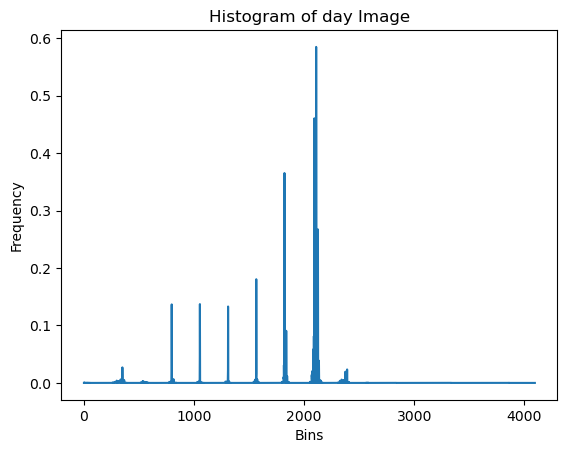

Histogram array for day image:
[0. 0. 0. ... 0. 0. 0.]


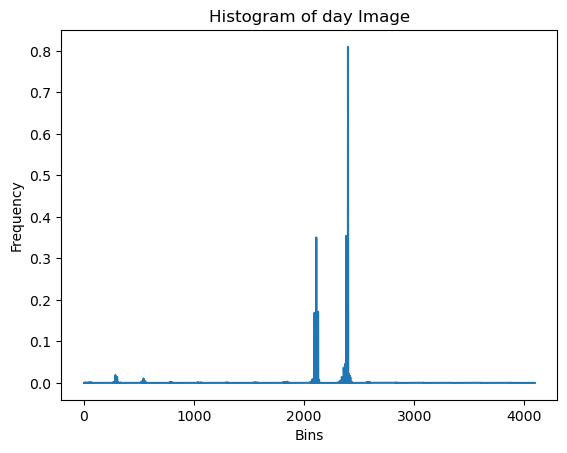

Histogram array for day image:
[0. 0. 0. ... 0. 0. 0.]


In [5]:
train_data, train_labels = load_data(train_dir)
test_data, test_labels = load_data(test_dir)

In [6]:
model = SVC(kernel='linear')
model.fit(train_data, train_labels)

SVC(kernel='linear')

In [7]:
test_predictions = model.predict(test_data)

In [8]:
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 98.12%
